# Support vector machines (SVM)
### Pros:
1. **Effective in High-Dimensional Spaces**: Works well when the number of features is large.
2. **Robust to Overfitting**: Especially useful in small datasets.
3. **Works with Non-Linear Data**: Through the use of kernels.
4. **Maximizes Margin**: Ensures better generalization.

### Cons:
1. **Computationally Expensive**: Training time increases with large datasets.
2. **Difficult to Tune**: Kernel and hyperparameter selection can be complex.
3. **Requires Feature Scaling**: Sensitive to different feature scales.
4. **Less Interpretable**: Harder to understand compared to decision trees.

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import mglearn

Text(0, 0.5, 'Feature 1')

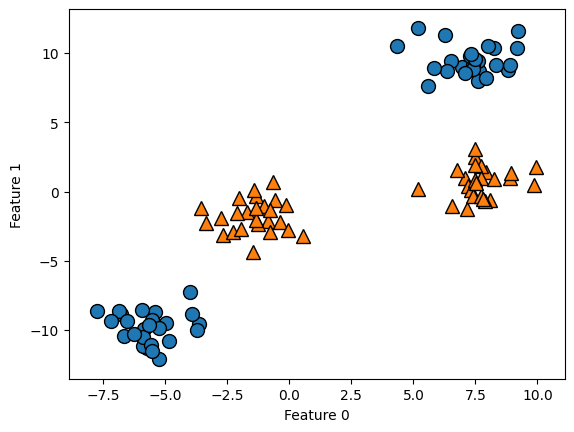

In [14]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

For this dataset a linear model will not due a good job. Kernelized SVM tricks is, in short, sending the features to a higher dimentsional space where the features will be better divided by a linear model.

Text(0, 0.5, 'Feature 1')

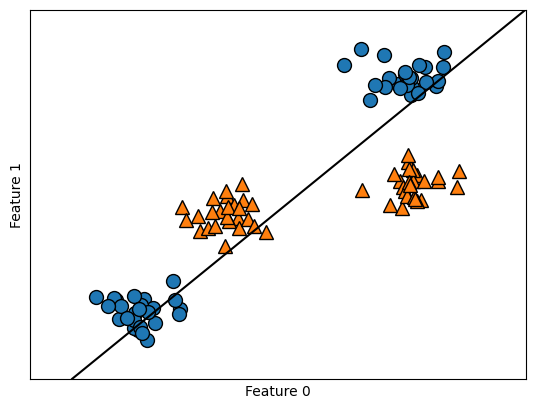

In [15]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, (feature0, feature1, feature1 ** 2).

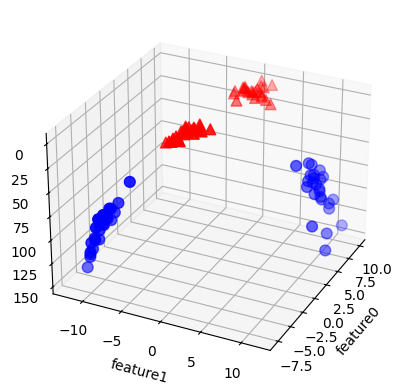

In [16]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
# Create a 3D subplot and set the view angles
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)

# Plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.show()


In the new representation of the data, it is now indeed possible to separate the two classes using a linear model, a plane in three dimensions

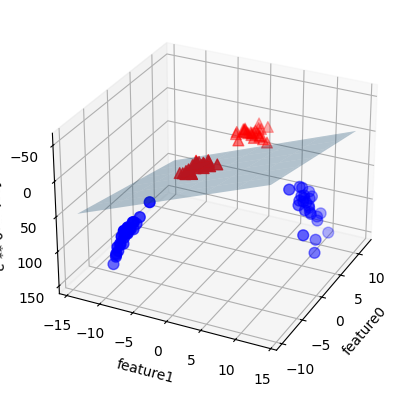

In [18]:
from sklearn.svm import LinearSVC

# Fit a linear SVM on the modified data
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)

# Create a grid to plot the decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# Plot the decision boundary surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot the data points
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

plt.show()


As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse, as you can see from the plot created here:

Text(0, 0.5, 'Feature 1')

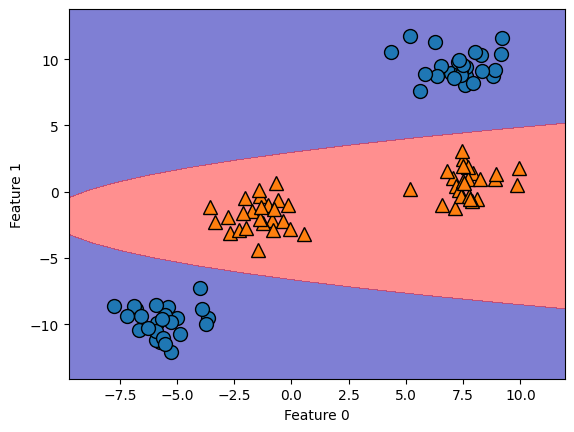

In [19]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")